### meta kaggle

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score


pd.set_option('display.max_colwidth', -1)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

cmptns = pd.read_csv('meta-kaggle/Competitions.csv')


evlgs = pd.read_csv('meta-kaggle/EvaluationAlgorithms.csv')
cmptns = pd.merge(
    cmptns,
    evlgs,
    left_on='EvaluationAlgorithmId',
    right_on='Id',
    suffixes=('', 'Eval_'))

cmptns.rename(columns={'Name': 'EvalName'}, inplace=True)

evc = pd.DataFrame(cmptns.EvalName.value_counts())
def prettify(evc):
    evc.columns = ['n_competitions']
    evc['metric'] = evc.index.values
    evc = evc.reset_index(drop=True)
    evc = evc[['metric', 'n_competitions']]
    return evc
evc = prettify(evc)
evc.head(10)

,metric,n_competitions
0,Area Under Receiver Operating Characteristic Curve,62
1,Categorization Accuracy,61
2,Root Mean Squared Error,47
3,Mean Absolute Error,19
4,Log Loss,13
5,Root Mean Squared Logarithmic Error,10
6,Mean F-Score,7
7,Levenshtein Mean,7
8,Normalized Gini Index,3
9,QuadraticWeightedKappa,3


In [111]:
evcm = pd.DataFrame(cmptns[(cmptns.RewardTypeId==1) & (cmptns.RewardQuantity>1000)].EvalName.value_counts())
evcm = prettify(evcm)
evcm.columns = ['metric', 'n_competitions_$1000+']
evcm.head(10)

,metric,n_competitions_$1000+
0,Area Under Receiver Operating Characteristic Curve,19
1,Root Mean Squared Error,15
2,Log Loss,10
3,Root Mean Squared Logarithmic Error,7
4,Mean Absolute Error,5
5,Categorization Accuracy,3
6,QuadraticWeightedKappa,3
7,Multiclass Loss,2
8,Normalized Gini Index,2
9,Mean Columnwise Area Under Receiver Operating Characteristic Curve,2


In [112]:
evcj = pd.merge(evc, evcm, on='metric')

evcj.fillna(0, inplace=True)
evcj['n_competitions_$1000+'] = evcj['n_competitions_$1000+'].astype(int)
evcj.sort_values('n_competitions_$1000+', ascending=False, inplace=True)
evcj.head(10)

,metric,n_competitions,n_competitions_$1000+
0,Area Under Receiver Operating Characteristic Curve,62,19
2,Root Mean Squared Error,47,15
4,Log Loss,13,10
5,Root Mean Squared Logarithmic Error,10,7
3,Mean Absolute Error,19,5
8,QuadraticWeightedKappa,3,3
1,Categorization Accuracy,61,3
7,Normalized Gini Index,3,2
9,Multiclass Loss,3,2
14,Mean Columnwise Area Under Receiver Operating Characteristic Curve,2,2


### root_mean_squared_log_err formula

In [113]:
def root_mean_squared_log_err(y_true, y_pred):
    log_pred = np.log(y_pred + 1)
    log_true = np.log(y_true + 1)
    squared_log_err = (log_pred - log_true)**2
    mean_squared_log_err = squared_log_err.mean()
    root_mean_squared_log_err = np.sqrt(squared_log_err.mean())
    return root_mean_squared_log_err

### regression comparison

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

#### rmsq v.s. mae

In [115]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_yy(y_true, y_pred):
    x = range(len(y_true))
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_true, '.--', label='y_true')
    plt.plot(x, y_pred, 'x', label='y_pred')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')

def plot_compare_mae_rmsle(y_true, y_pred):
    plot_yy(y_true, y_pred)
    plt.ylim(0, 8)
    plt.title('Root Mean Square Error: %.2f; Mean Absolute Error  %.2f' %
              (root_mean_squared_error(y_true, y_pred),
               mean_absolute_error(y_true, y_pred)))

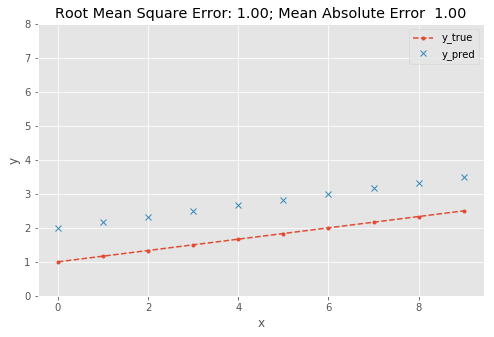

In [116]:
n = 10
x = np.linspace(0, 1, n)
y_true = 1 + 1.5 * x
y_pred = y_true + 1
plot_compare_mae_rmsle(y_true, y_pred)

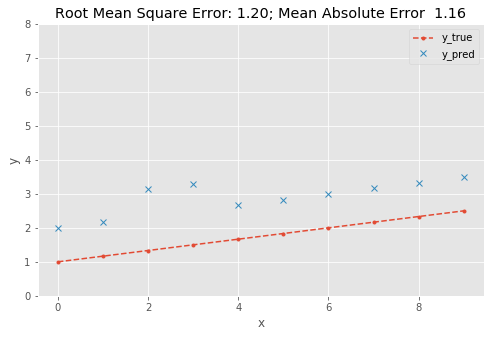

In [117]:
y_pred = y_true + 1
y_pred[2:4] = y_true[2:4] + 1.8
plot_compare_mae_rmsle(y_true, y_pred)

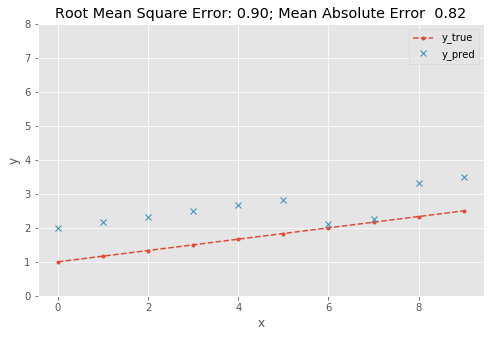

In [118]:
y_pred = y_true + 1
y_pred[6:8] = y_true[6:8] + 00.1
plot_compare_mae_rmsle(y_true, y_pred)

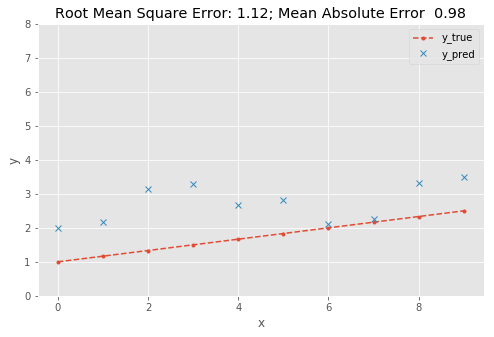

In [119]:
y_pred = y_true + 1
y_pred[2:4] = y_true[2:4] + 1.8
y_pred[6:8] = y_true[6:8] + 00.1
plot_compare_mae_rmsle(y_true, y_pred)

#### rmsq v.s. rmsle

In [120]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def root_mean_squared_log_error(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


def plot_yy(y_true, y_pred):
    x = range(len(y_true))
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_true, '.--', label='y_true')
    plt.plot(x, y_pred, 'x', label='y_pred')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')


def plot_compare_rmse_rmsle(y_true, y_pred):
    plot_yy(y_true, y_pred)
    plt.ylim(0, 3800)
    plt.title('Root Mean Square Error: %.2f; Root Mean Squared Logarithmic Error  %.2f' %
              (root_mean_squared_error(y_true, y_pred),
               root_mean_squared_log_error(y_true, y_pred)))

In [121]:
n = 10
x = np.linspace(0, 10, n)
y_true = 100 + 100 * x
y_pred = y_true + 100

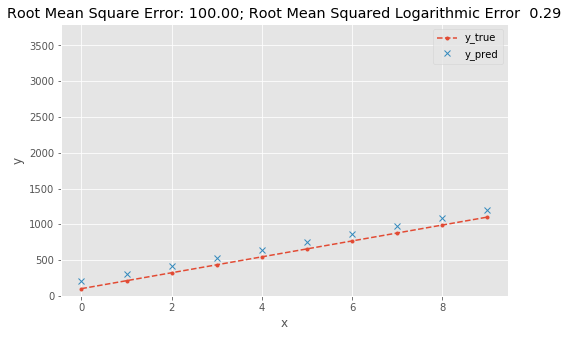

In [122]:
plot_compare_rmse_rmsle(y_true, y_pred)

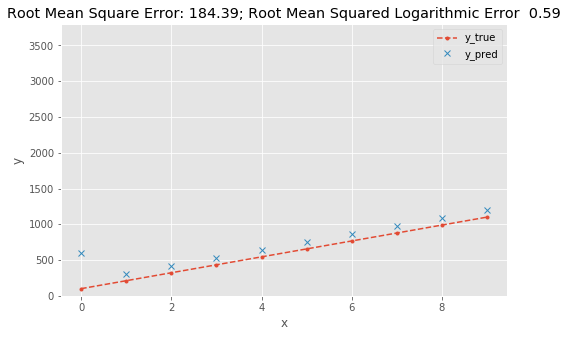

In [123]:
y_pred = y_true + 100
i = 0
y_pred[i] = 3 * y_pred[i]
plot_compare_rmse_rmsle(y_true, y_pred)

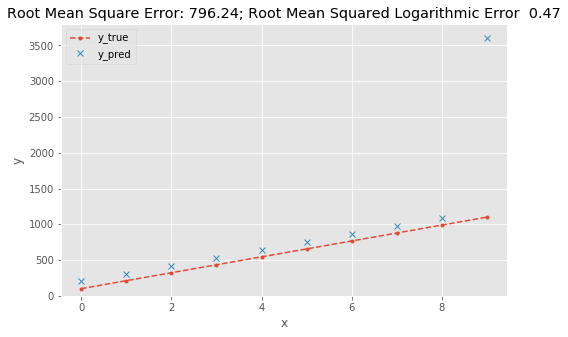

In [124]:
y_pred = y_true + 100
i = 9
y_pred[i] = 3 * y_pred[i]
plot_compare_rmse_rmsle(y_true, y_pred)

### R2

In [143]:
from sklearn.metrics import r2_score
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def plot_yy_r2(y_true, y_pred):
    x = range(len(y_true))
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_true, '.--', label='y_true')
    plt.plot(x, y_pred, 'x', label='y_pred')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, 18)
    plt.title('R2: %.2f; Root Mean Square Error: %.2f' %
              (r2_score(y_true, y_pred),
               root_mean_squared_error(y_true, y_pred)))

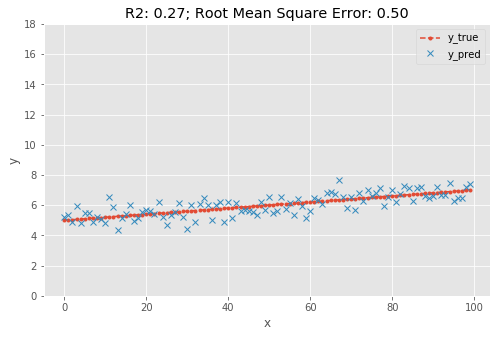

In [148]:
n = 100
x = np.linspace(0, 1, n)
y_true = 5 + 2 * x
error = 0.5*np.random.normal(size=n)
y_pred = y_true + error

plot_yy_r2(y_true, y_pred)

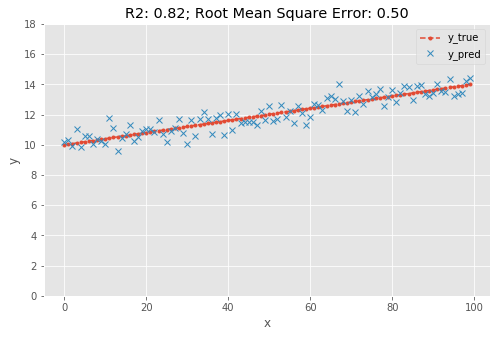

In [149]:
y_true = 2 * y_true
y_pred = y_true + error

plot_yy_r2(y_true, y_pred)

### logloss

### roc_auc